<a href="https://colab.research.google.com/github/SiddharthDNathan/Unsupervised-ML-Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Netflix Movies and TV Shows Clustering**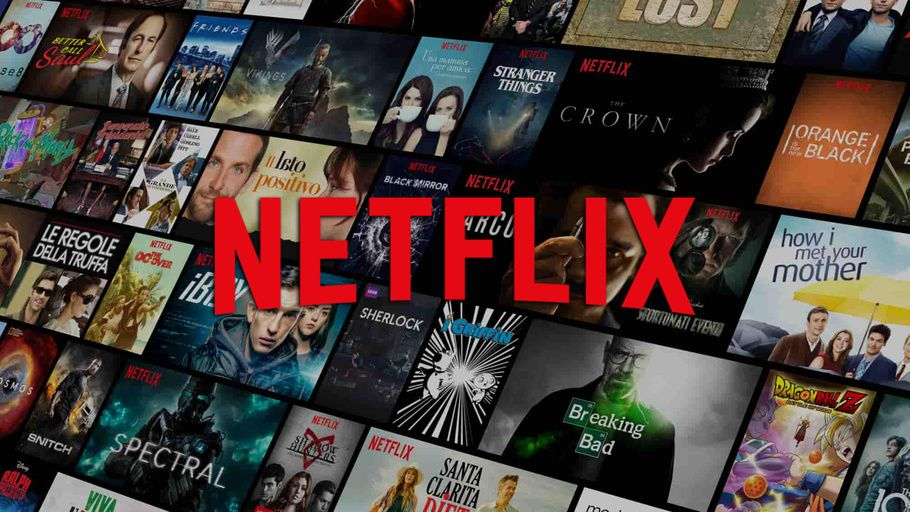

## GitHub Link - https://github.com/SiddharthDNathan/Unsupervised-ML-Netflix-Movies-and-TV-Shows-Clustering

##### **Project Type**    - Unsupervised Clustering
##### **Contribution**    - Individual

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

* There were approximately 7787 records and 12 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, and others, we constructed cluster with the K-Means Clustering algorithms, and determined the optimal number of clusters

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Textual Data Preprocessing
7.   Model Impelementation
8.   Recommendation System.
9.   Conclusion

## **1. Problem Statement**

Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 851.6 kB/s eta 0:00:00


In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# libraries used to process textual data
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# libraries used to implement clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# load the NETFLIX MOVIES AND TV SHOWS CLUSTERING data set from the drive
df = pd.read_csv('/content/drive/MyDrive/CSV Files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Viewing the last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
df.shape

(7787, 12)

In [ ]:
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

<Axes: >

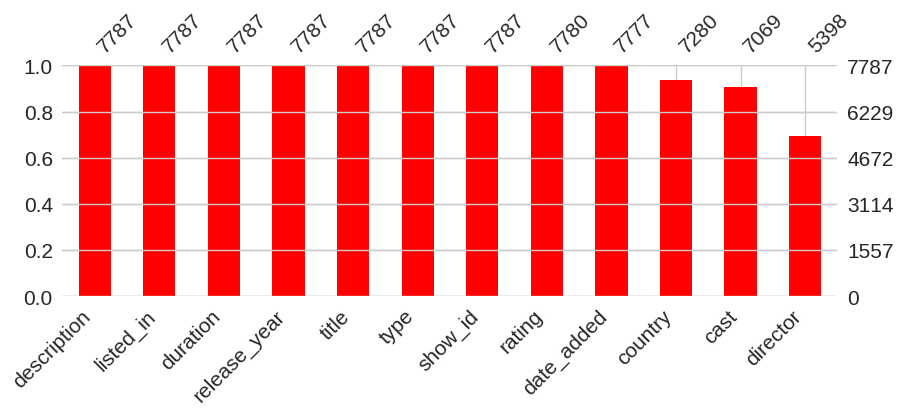

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='red',sort='descending', figsize=(10,3), fontsize=15)

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Despite our data is really small, Dropping Null values is our best bet.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows across all columns:")
print(duplicate_rows)

Duplicate rows across all columns:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


## **3. Understanding Your Variables**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,4808.000000
mean,2012.710275
std,9.521541
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


###  Variables Description

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 4808
No. of unique values in type is 2
No. of unique values in title is 4808
No. of unique values in director is 3613
No. of unique values in cast is 4688
No. of unique values in country is 544
No. of unique values in date_added is 1291
No. of unique values in release_year is 71
No. of unique values in rating is 14
No. of unique values in duration is 195
No. of unique values in listed_in is 323
No. of unique values in description is 4803


### Observations:

* We are focusing on several key columns of our dataset, including 'type', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement K-means clustering algorithm.

In [ ]:
#Dropping columns that does not bring much information to our clustering algo.
df.drop(columns = ['show_id', 'title'],inplace = True)

## **4. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.

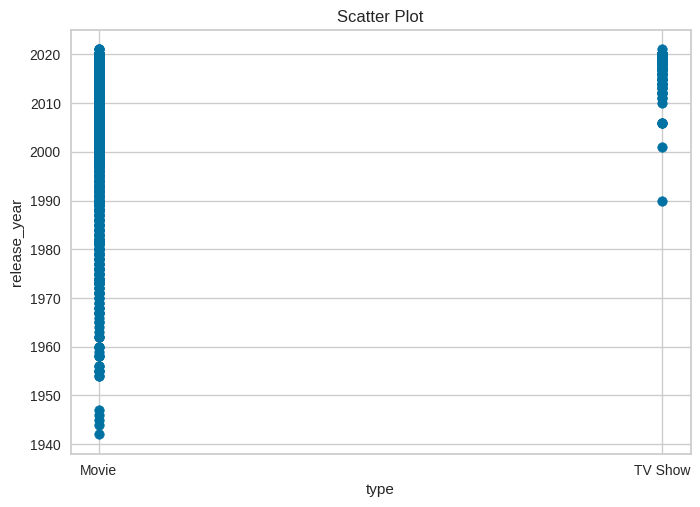

In [ ]:
plt.scatter(df['type'], df['release_year'])
plt.xlabel('type')
plt.ylabel('release_year')
plt.title('Scatter Plot')
plt.show()

In [ ]:
# number of values of different categories in 'type'
df['type'].value_counts()

type
Movie      4673
TV Show     135
Name: count, dtype: int64

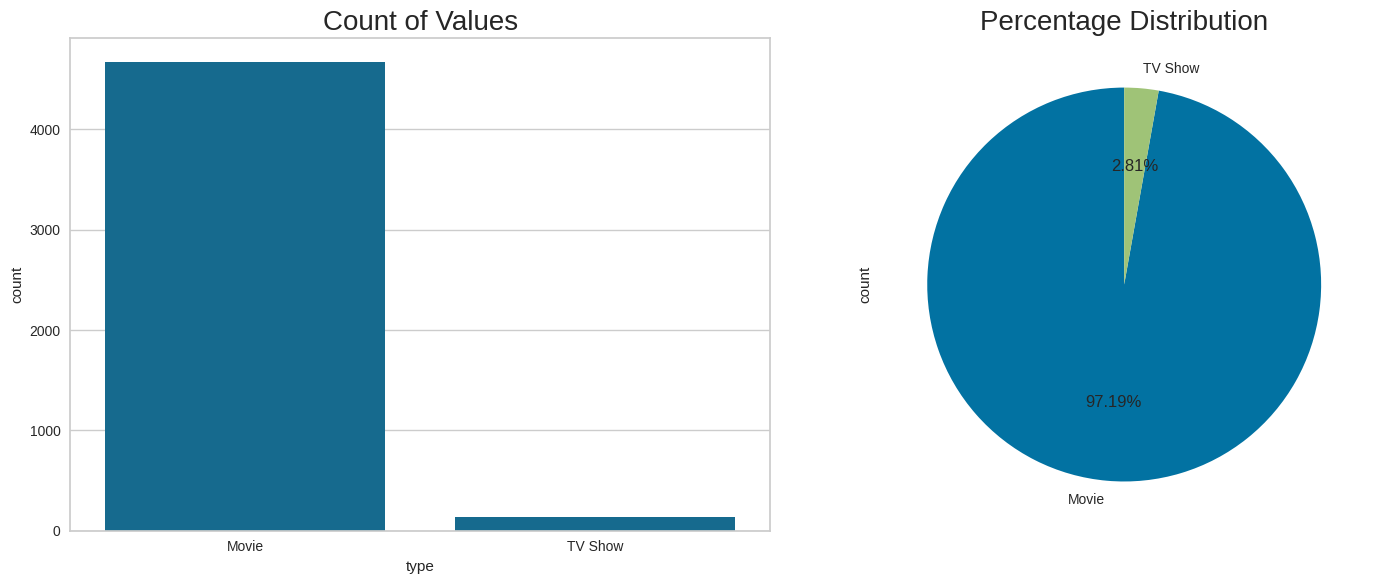

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

**Observations:**

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

**Director**

In [ ]:
print(f'number of unique directors : {df.director.nunique()}')
print(f'null values in the column : {df.director.isna().sum()}')

number of unique directors : 3613
null values in the column : 0


In [ ]:
print(f"Number of Movies directed by directors are : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : { df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 135
Number of TV shows directed by directors are : 4673


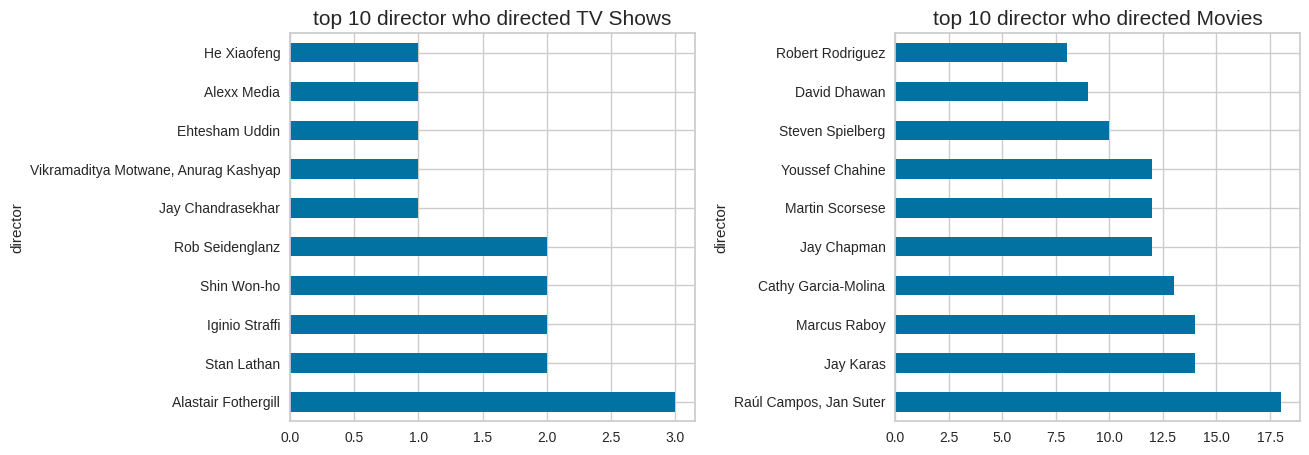

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

**Cast**

In [ ]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher              41
Shah Rukh Khan           34
Om Puri                  30
Akshay Kumar             29
Naseeruddin Shah         29
                         ..
Tara Breathnach           1
Frank O'Sullivan          1
Haaz Sleiman              1
Michael Whitehall         1
Chittaranjan Tripathy     1
Name: count, Length: 23215, dtype: int64

In [ ]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 1196
Number of Movies actors: 22427


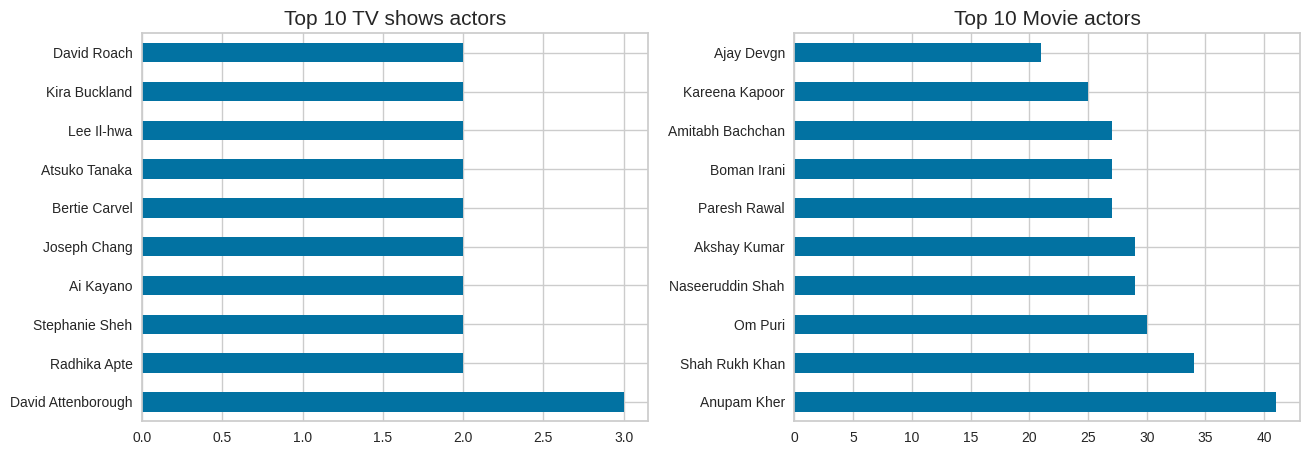

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

**Country**

In [ ]:
# number of unique values
df['country'].nunique()

544

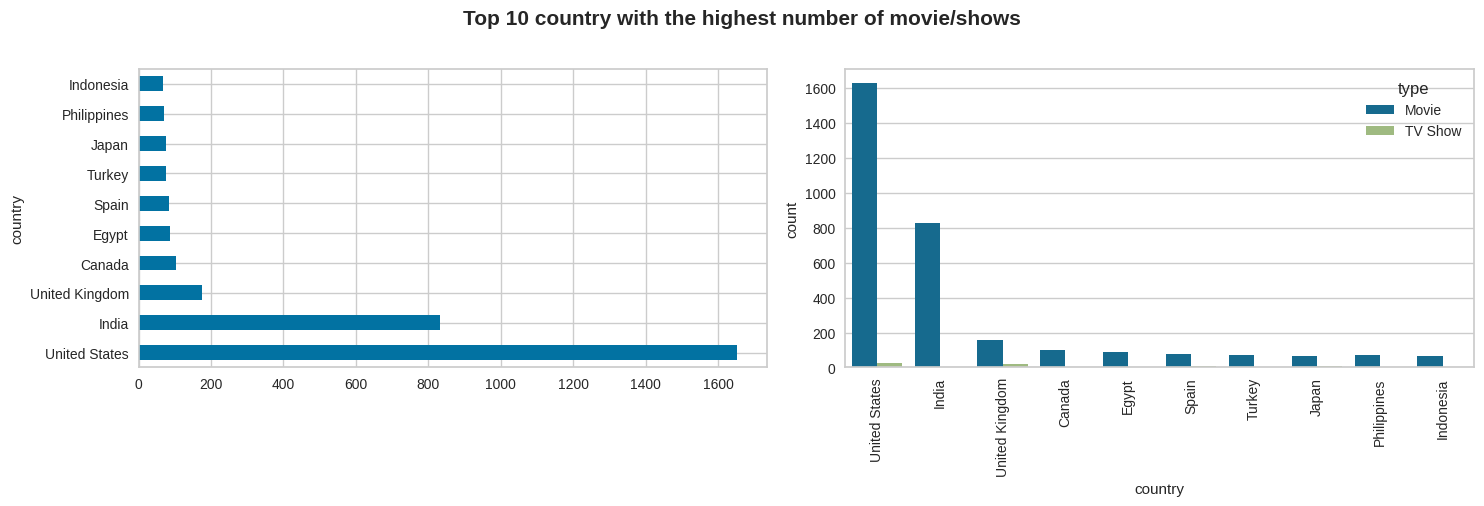

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**
* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.


**Realse_year**

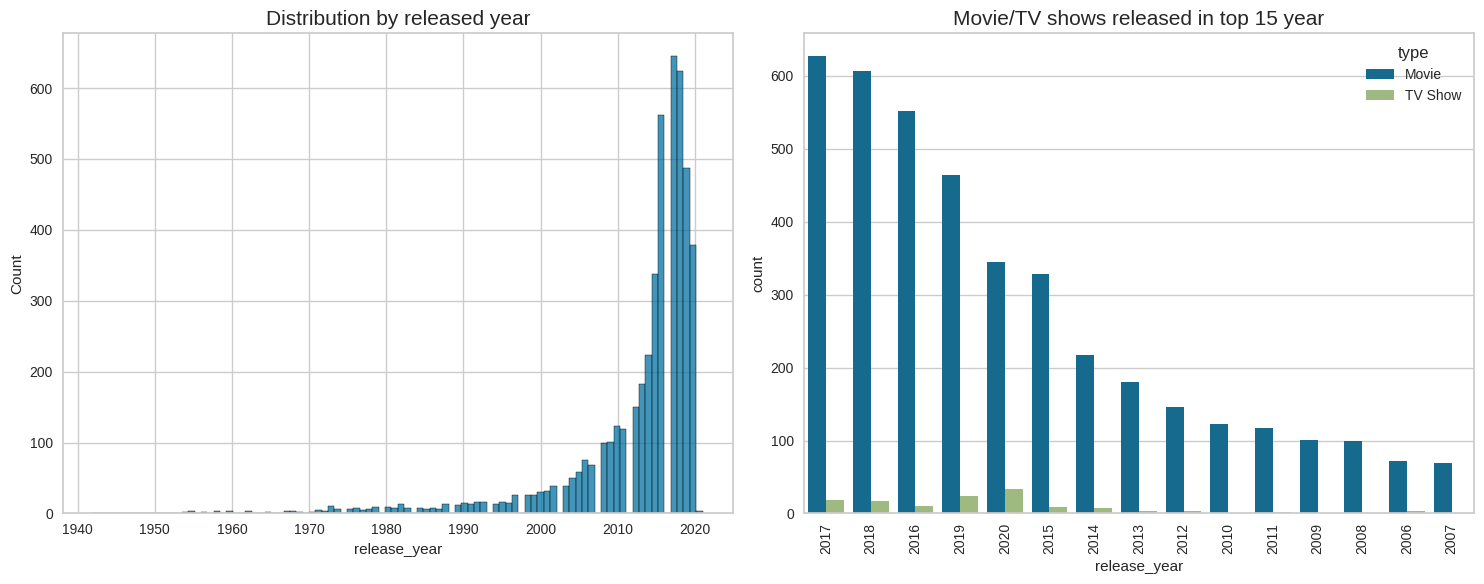

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

**Rating**

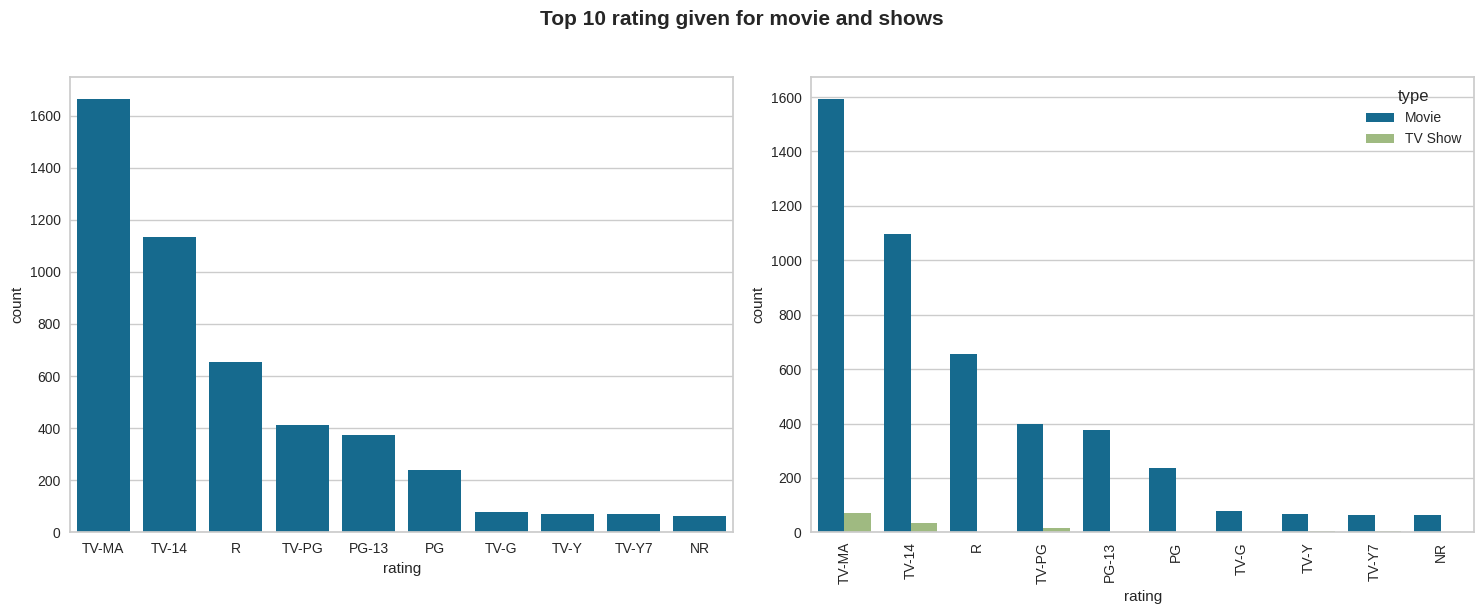

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

**Listed_in**

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2178
1,Dramas,2038
2,Comedies,1405
3,Action & Adventure,696
4,Independent Movies,666


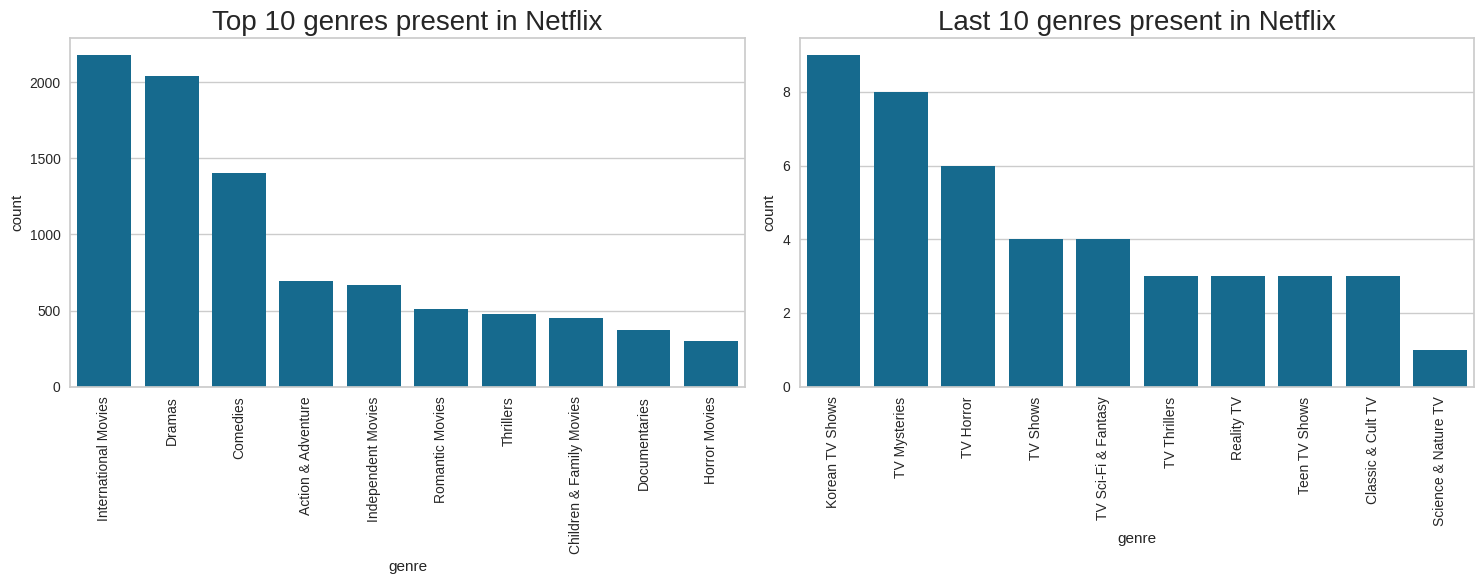

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

**Description**

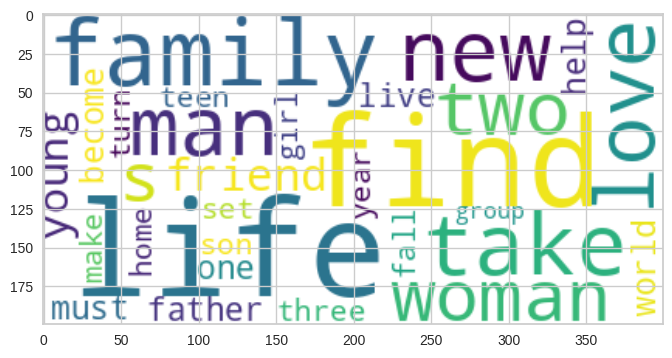

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation:**
* The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

### **Handling Outliers**

<Axes: >

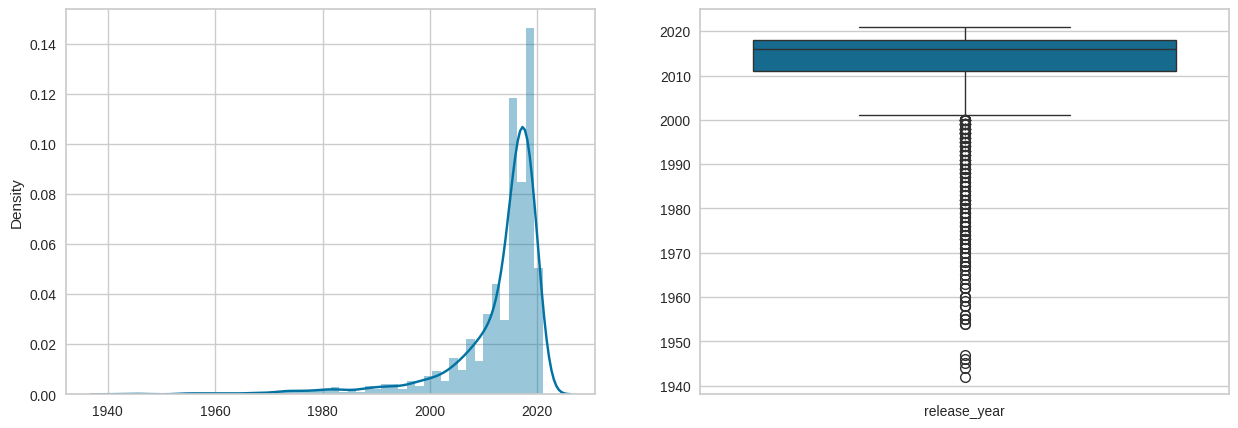

In [ ]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])

**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

## **6.Data Preparation and Textual Data Preprocessing**

#### **What is data preparation?**
* Data preparation is a critical step in preparing data for machine learning models. It involves understanding the data 📊, handling missing values and outliers 🧩, normalizing and scaling the data ⚖️ ✨ and dealing with categorical variables 📝. By properly preparing the data, we ensure that it is in a suitable format for training and improves the performance and accuracy of the ML models. In this lesson, we will explore the different aspects of data preparation and the techniques used to address each of them. 🎯

#### **What is textual data preprocessing?**
* Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization etc . The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

### **6.1 Encoding Features**

Encode categorical variables: Convert categorical variables like 'type', 'country', 'rating', etc., into numerical format using techniques like Label Encoding.

In [ ]:
columns_to_encode = ['type', 'country', 'rating']
label_encoder = ce.OrdinalEncoder(cols=columns_to_encode)
df = label_encoder.fit_transform(df)

### **6.2 Removing Stop words, Lemmatization and Text Vectorization.**

In natural language processing (NLP) tasks, removing stop words and lowercasing words are common pre-processing steps.
* **Stop words Removal:**  Words such as "a," "an," "the," and "is," are words that are commonly used in a language but do not convey much meaning. These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

Lemmatization:

In Natural Language Processing (NLP), lemmatization is the process of reducing words to their base or dictionary form, known as the "lemma." The purpose of lemmatization is to standardize words so that different inflected forms or variations of a word can be treated as the same word.

Lemmatization involves considering a word's context and morphological analysis to transform it into its base form. This base form is typically a valid word that can be found in a dictionary, making it useful for various NLP tasks.

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Lemmatize and remove stopwords
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

columns_to_tok_lem = ['director', 'cast', 'listed_in', 'description']
for column in columns_to_tok_lem:
     df[column+'_processed'] = df[column].apply(preprocess)

#TF-IDF
cols_to_vectorize = ['director_processed', 'cast_processed', 'listed_in_processed', 'description_processed' ]
tfidf_vectorizers = {}
tfidf_matrices = {}
for column in cols_to_vectorize:
    tfidf_vectorizers[column] = TfidfVectorizer()
    tfidf_matrices[column] = tfidf_vectorizers[column].fit_transform(df[column])

tfidf_df = pd.DataFrame(tfidf_matrices[column].toarray(), columns=tfidf_vectorizers[column].get_feature_names_out())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tfidf_df

,000,007,10,100,1000,10th,11,112,11th,12,...,zuckerberg,zuhu,zurich,álex,álvaro,ángel,émile,über,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **6.6 Dimensionality Reduction**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

PCA is sensitive to the variances of the initial variables. Since higher variance variables have a larger effect on the principal components, it's common practice to standardize the data before applying PCA. This will transform our data to have a mean of 0 and a standard deviation of 1 for each feature. Let's standardize our student marks dataset.

In [ ]:
scaler = StandardScaler()
tfidf_df = scaler.fit_transform(tfidf_df)

Now, we'll apply PCA to the standardized data. PCA will transform the original data into a new set of variables, the principal components, which are orthogonal (uncorrelated) and maximize the variance.

We'll start by computing PCA and then analyze the amount of variance captured by each principal component. This will give us insight into how many components we might want to keep. Let's perform PCA using scikit-learn's PCA implementation.

In [ ]:
pca = PCA()
tfidf_df = pca.fit_transform(tfidf_df)

In [ ]:
pca_tfidfdf = pd.DataFrame(data = tfidf_df, columns=[f'PC{i+1}' for i in range(len(tfidf_df))])

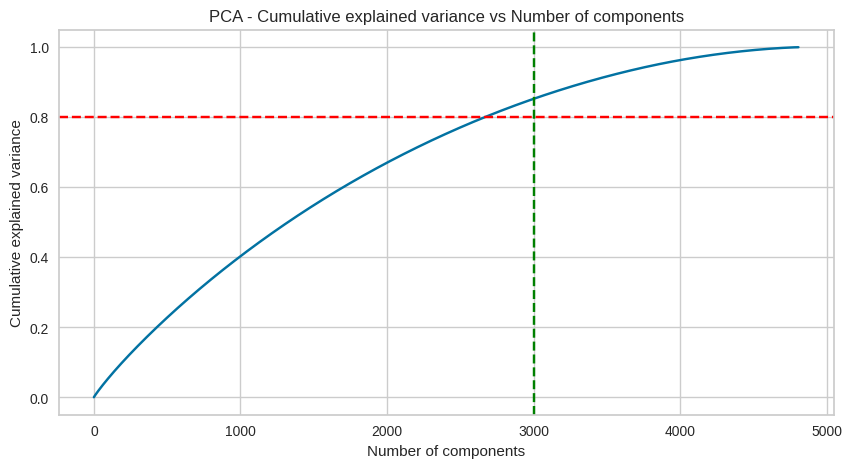

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 4800 components account for 100 percent of the variance.
* 3000 components alone account for more than 80% of the variance.
* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

# **OR**

The principal components (PCs) are now new features created by PCA. Let's look at how much variance each PC captures. This is important because it tells us how much information from the original data is preserved in each component. We'll plot the explained variance ratio for each principal component. ​

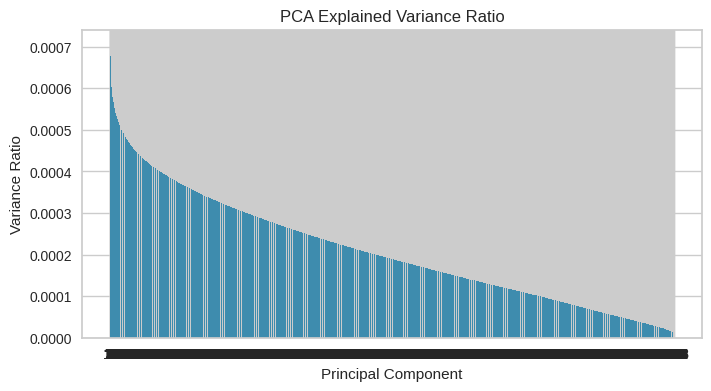

In [ ]:
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


Explained Variance Plot Interpretation

The bar chart above shows the variance ratio captured by each principal component (PC). The first few PCs capture the most variance, and as we move to higher-numbered PCs, the amount of variance captured decreases.

PC1 captures the most variance, followed by PC2, PC3, and so on. The rapid drop in variance captured after the first few PCs suggests that these components contain most of the information in the dataset.


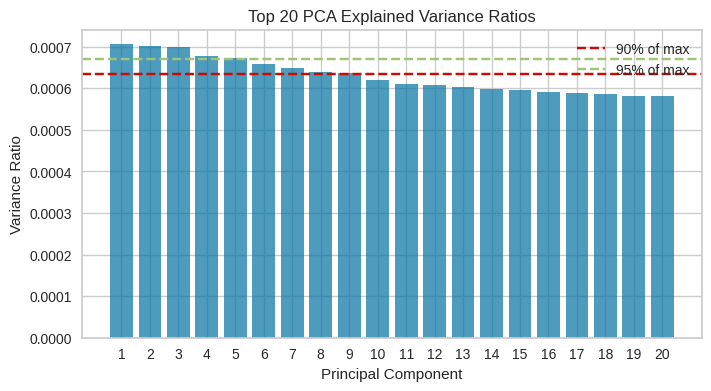

In [ ]:
top_20_explained_variance = explained_variance[:20]

# Plotting the top 20 explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(top_20_explained_variance) + 1), top_20_explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Top 20 PCA Explained Variance Ratios')
plt.xticks(range(1, len(top_20_explained_variance) + 1))


highest_value = max(top_20_explained_variance)
threshold_90 = 0.9 * highest_value
threshold_95 = 0.95 * highest_value

# Add horizontal lines at 90% and 95% of highest value
plt.axhline(y=threshold_90, color='r', linestyle='--', label='90% of max')
plt.axhline(y=threshold_95, color='g', linestyle='--', label='95% of max')

# Show legend
plt.legend()

plt.show()

Explained Variance Plot: The bar plot visualizes the explained variance ratios for the top 20 principal components. Each bar represents the proportion of variance explained by a principal component, indicating how much information each component retains from the original data.
Threshold Lines: Horizontal dashed lines are added at 90% and 95% of the highest value of explained variance. These lines serve as thresholds for determining the number of principal components to retain. Components with explained variance ratios above these thresholds are considered significant.
Interpretation: The plot allows us to assess the cumulative contribution of each principal component towards explaining the total variance in the data. We can observe the diminishing returns of adding additional components, as indicated by the decreasing heights of the bars.
Threshold Interpretation: Components above the threshold lines (90% and 95% of max) capture a significant amount of variance in the data. We can use these thresholds to make informed decisions about the number of principal components to retain for dimensionality reduction while preserving most of the information in the dataset.
Model Selection: Based on these thresholds, we can decide on the appropriate number of principal components to use for downstream tasks such as clustering or classification. We aim to strike a balance between dimensionality reduction and information retention to avoid overfitting or loss of important features.



so we take 9 components to reduce dimentionality

In [ ]:
n = 9
pca_2 = PCA(n_components=n)
tfidf_df2 = pca_2.fit_transform(tfidf_df)

In [ ]:
pca_tfidfdf2 = pd.DataFrame(data = tfidf_df2, columns=[f'PC{i+1}' for i in range(n)])

In [ ]:
pca_tfidfdf2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.174284,-0.353860,0.006139,0.296542,-0.177896,0.447382,-0.205321,-0.135322,0.352901
1,-0.168812,-0.774066,0.045134,0.158629,-0.402628,1.320911,-0.013137,-0.965889,-0.075366
2,0.550001,-0.827029,-0.117586,0.813370,0.191691,1.023130,0.289103,-0.038390,0.388730
3,0.479175,0.454395,0.394709,-1.504865,0.171785,0.298486,1.252252,-2.017454,4.775577
4,0.234323,-0.151754,-0.461865,0.627387,-0.511131,0.061949,-0.169372,0.994274,-0.755692
...,...,...,...,...,...,...,...,...,...
4803,0.292595,-0.566983,-0.144406,0.243482,-0.310553,0.866093,0.557503,-0.720535,0.358794
4804,-0.248135,-0.504241,-0.063137,-0.261757,0.148157,2.019686,0.545550,0.813914,0.124711
4805,-0.057423,-0.437931,0.147427,-0.243779,-0.036548,0.668749,0.252643,-0.664124,0.123087
4806,-0.031968,-0.815945,-0.817137,-0.404918,-0.570612,2.161478,-0.133894,-0.780667,-0.382814


we generated a secondary DataFrame that encapsulates the Principal Components (PCs) derived from the textual data present in our primary DataFrame, denoted as df. Initially, we established an empty dictionary, tfidf_matrices, which was intended to store the TF-IDF (Term Frequency-Inverse Document Frequency) matrices corresponding to each textual column within our primary DataFrame. Subsequently, we iterated through each column identified for textual vectorization, employing a TfidfVectorizer object to transform the text data into TF-IDF matrices. These matrices were then stored in the tfidf_matrices dictionary with the column names as keys. Following this, a DataFrame, tfidf_df, was constructed from the TF-IDF matrix of the final column in the vectorization list. This DataFrame facilitated the conversion of the sparse matrix representation to a dense array format, and appropriate column names were assigned to it. Further, a StandardScaler instance was initialized to standardize the TF-IDF features within tfidf_df, ensuring a mean of 0 and a standard deviation of 1 across features. Subsequent application of Principal Component Analysis (PCA) on the standardized TF-IDF features reduced the data's dimensionality while retaining a significant portion of its variance. Finally, the transformed PCA data was integrated into a new DataFrame, pca_tfidfdf, with columns labeled 'PC1', 'PC2', and so forth upto PC10, each representing a principal component that captures a distinct linear combination of the original TF-IDF features.

In the subsequent step, we proceeded to refine and sanitize the primary DataFrame by eliminating all columns containing textual data, along with their corresponding lemmatized versions that were utilized in generating the secondary DataFrame. These columns encompassed various textual descriptors such as directors, cast members, listed genres, and descriptions. By discarding these columns, we streamlined the primary DataFrame to retain only the numerical and categorical features relevant to our analysis, facilitating a more focused and structured dataset for further exploration and modeling tasks. This process aids in simplifying subsequent analytical procedures and enhances the efficiency of computational operations by reducing unnecessary data complexity and redundancy.

In [ ]:
cols_to_drop = [ 'director', 'cast', 'listed_in', 'description','director_processed', 'cast_processed', 'listed_in_processed', 'description_processed' ]
df.drop(columns = cols_to_drop, inplace = True)

In [ ]:
df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
df['day_of_week'] = df['date_added'].dt.dayofweek


In [ ]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(int)

In [ ]:
df.drop(columns = ['date_added','year','duration'], inplace = True)

In these steps, we performed several data preprocessing operations on the DataFrame 'df'. Initially, we removed any leading or trailing whitespace characters from the 'date_added' column entries using the 'str.strip()' method to ensure uniform formatting. Subsequently, we converted the 'date_added' column values to datetime objects, specifying the format as '%B %d, %Y' to match the date format present in the data. We then extracted the year, month, day, and day of the week from the 'date_added' column and created separate columns for each of these temporal features. Additionally, we extracted the numeric duration values from the 'duration' column using regular expressions, converting them to integers and storing them in a new 'duration_numeric' column. Finally, we dropped the original 'date_added' and 'duration' columns along with the 'year' column, as these features were redundant or transformed. Afterward, we scaled the numerical features of the DataFrame using the StandardScaler to ensure uniformity in their magnitude and distribution, resulting in a scaled DataFrame named 'scaled_df'. These preprocessing steps lay the groundwork for subsequent analysis and modeling tasks on the dataset.

# **Standardization of Primary DF**

In [ ]:
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [ ]:
scaled_df

,type,country,release_year,rating,month,day,day_of_week,duration_numeric
0,-0.169969,-0.465399,0.345539,-0.923908,1.459507,1.111114,0.558809,-0.212974
1,-0.169969,-0.455843,-0.179640,-0.519488,1.459507,0.810007,0.003465,-0.698547
2,-0.169969,-0.446287,-0.389712,-0.115068,1.182952,0.408531,0.003465,-0.633804
3,-0.169969,-0.446287,-0.494748,-0.115068,-1.582599,-1.097002,-0.551878,0.758173
4,5.883436,-0.436731,0.345539,-0.923908,0.076731,-1.097002,1.114152,-3.191156
...,...,...,...,...,...,...,...,...
4803,-0.169969,-0.446287,-0.389712,-0.519488,1.182952,-1.097002,0.558809,-0.374831
4804,-0.169969,-0.417619,0.555611,-0.923908,0.076731,-1.097002,1.669496,-0.180602
4805,-0.169969,-0.446287,-0.704820,1.907031,-1.582599,-0.093313,1.114152,-0.374831
4806,-0.169969,4.723495,-0.809856,-0.923908,0.906397,0.709638,-1.662566,-0.018744


In [ ]:
final_df = pd.concat([scaled_df, pca_tfidfdf2], axis=1)

In this step, we combined two DataFrames, 'scaled_df' and 'pca_tfidfdf2', along the column axis (axis=1) using the 'pd.concat()' function provided by the pandas library. The 'scaled_df' DataFrame contains the scaled numerical features after preprocessing, while 'pca_tfidfdf2' holds the principal component analysis (PCA) results of the textual data. By concatenating these DataFrames, we merged the numerical features with the derived principal components, creating a unified DataFrame named 'final_df'. This combined DataFrame retains both the original numerical features and the reduced-dimensional representation of the textual data, facilitating further analysis and modeling tasks.


In [ ]:
final_df

,type,country,release_year,rating,month,day,day_of_week,duration_numeric,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.169969,-0.465399,0.345539,-0.923908,1.459507,1.111114,0.558809,-0.212974,-0.174284,-0.353860,0.006139,0.296542,-0.177896,0.447382,-0.205321,-0.135322,0.352901
1,-0.169969,-0.455843,-0.179640,-0.519488,1.459507,0.810007,0.003465,-0.698547,-0.168812,-0.774066,0.045134,0.158629,-0.402628,1.320911,-0.013137,-0.965889,-0.075366
2,-0.169969,-0.446287,-0.389712,-0.115068,1.182952,0.408531,0.003465,-0.633804,0.550001,-0.827029,-0.117586,0.813370,0.191691,1.023130,0.289103,-0.038390,0.388730
3,-0.169969,-0.446287,-0.494748,-0.115068,-1.582599,-1.097002,-0.551878,0.758173,0.479175,0.454395,0.394709,-1.504865,0.171785,0.298486,1.252252,-2.017454,4.775577
4,5.883436,-0.436731,0.345539,-0.923908,0.076731,-1.097002,1.114152,-3.191156,0.234323,-0.151754,-0.461865,0.627387,-0.511131,0.061949,-0.169372,0.994274,-0.755692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,-0.169969,-0.446287,-0.389712,-0.519488,1.182952,-1.097002,0.558809,-0.374831,0.292595,-0.566983,-0.144406,0.243482,-0.310553,0.866093,0.557503,-0.720535,0.358794
4804,-0.169969,-0.417619,0.555611,-0.923908,0.076731,-1.097002,1.669496,-0.180602,-0.248135,-0.504241,-0.063137,-0.261757,0.148157,2.019686,0.545550,0.813914,0.124711
4805,-0.169969,-0.446287,-0.704820,1.907031,-1.582599,-0.093313,1.114152,-0.374831,-0.057423,-0.437931,0.147427,-0.243779,-0.036548,0.668749,0.252643,-0.664124,0.123087
4806,-0.169969,4.723495,-0.809856,-0.923908,0.906397,0.709638,-1.662566,-0.018744,-0.031968,-0.815945,-0.817137,-0.404918,-0.570612,2.161478,-0.133894,-0.780667,-0.382814


In [ ]:
final_df.describe()

,type,country,release_year,rating,month,day,day_of_week,duration_numeric,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03
mean,-4.995080e-16,-5.911337e-17,2.494584e-15,-1.027095e-16,1.529559e-16,2.697048e-17,1.123154e-16,1.389164e-16,-9.458140e-17,-2.009855e-16,3.546802e-17,1.093597e-16,-1.300494e-16,-1.182267e-17,1.004927e-16,-8.867006e-18,2.807885e-17
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,2.943820e+00,2.926483e+00,2.901948e+00,2.878807e+00,2.833250e+00,2.782052e+00,2.758632e+00,2.747770e+00,2.711640e+00
min,-1.699687e-01,-4.653986e-01,-7.427120e+00,-9.239075e-01,-1.582599e+00,-1.097002e+00,-1.662566e+00,-3.191156e+00,-8.932565e+01,-2.275768e+01,-9.165346e+01,-9.727555e+01,-6.984985e+01,-3.012331e+01,-5.707130e+01,-3.659388e+01,-4.514842e+01
25%,-1.699687e-01,-4.462866e-01,-1.796403e-01,-9.239075e-01,-1.029489e+00,-1.097002e+00,-1.107222e+00,-3.748313e-01,-2.236998e-01,-5.248662e-01,-2.361761e-01,-3.068443e-01,-5.360135e-01,-3.961066e-01,-4.210990e-01,-9.618989e-01,-5.198822e-01
50%,-1.699687e-01,-4.176187e-01,3.455394e-01,-1.150679e-01,7.673138e-02,-9.331301e-02,3.465122e-03,-1.874426e-02,-2.033293e-02,-2.575907e-01,6.812665e-02,1.606546e-03,-1.972155e-01,4.379917e-01,-1.168215e-02,-4.309724e-01,-1.155300e-01
75%,-1.699687e-01,-1.500515e-01,5.556113e-01,2.893520e-01,9.063966e-01,8.100070e-01,5.588087e-01,5.315720e-01,1.979005e-01,1.467438e-01,3.359720e-01,3.200450e-01,3.096367e-01,9.667698e-01,4.098846e-01,3.928686e-01,3.323737e-01
max,5.883436e+00,4.723495e+00,8.707191e-01,4.333550e+00,1.459507e+00,1.914065e+00,1.669496e+00,4.966474e+00,1.510609e+02,1.160543e+02,1.096661e+02,1.103612e+02,1.350579e+02,8.701867e+01,8.013774e+01,8.015530e+01,8.846105e+01


# **t-SNE**

a t-SNE (t-distributed Stochastic Neighbor Embedding) model is initialized with two components, indicating that the dimensionality of the data will be reduced to two dimensions. t-SNE is a technique used for dimensionality reduction, particularly well-suited for visualizing high-dimensional data in a lower-dimensional space while preserving the local structure of the data.

The importance of using t-SNE in the context of k-means clustering lies in its ability to reduce the dimensionality of the data while preserving the local relationships between data points. By reducing the dimensionality to two dimensions, t-SNE enables visualization of the data in a 2D scatter plot, which can help in understanding the underlying structure of the data and identifying clusters or patterns. This visualization can aid in selecting an appropriate number of clusters for k-means clustering and assessing the separation or overlap between clusters. Additionally, t-SNE can enhance the interpretability of the results obtained from k-means clustering by providing a visual representation of the clusters in a lower-dimensional space.

In [ ]:
# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_df = tsne.fit_transform(final_df)

### **7.1 K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

* We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

Silhouette Analysis:
Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


In [ ]:
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(tsne_df)
    centers = km.cluster_centers_

    score = silhouette_score(tsne_df, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(tsne_df)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.3532656729221344


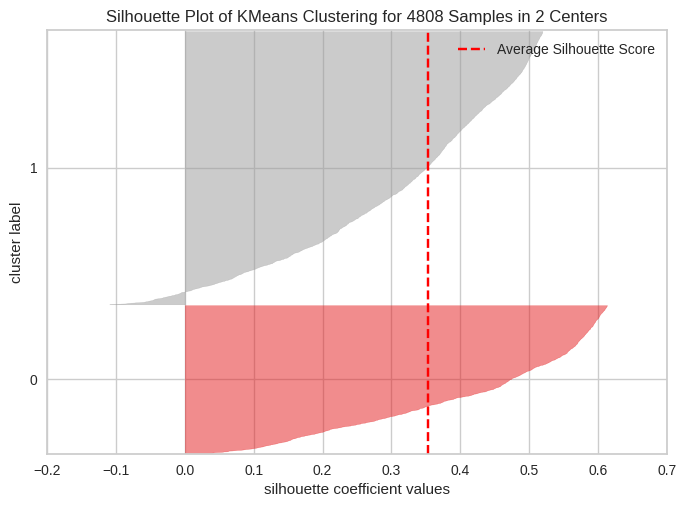

For n_clusters = 3, silhouette score is 0.41211023926734924


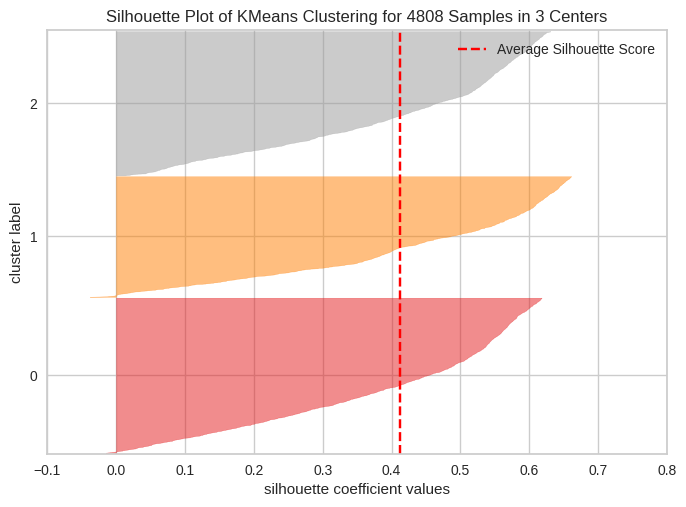

For n_clusters = 4, silhouette score is 0.38301900029182434


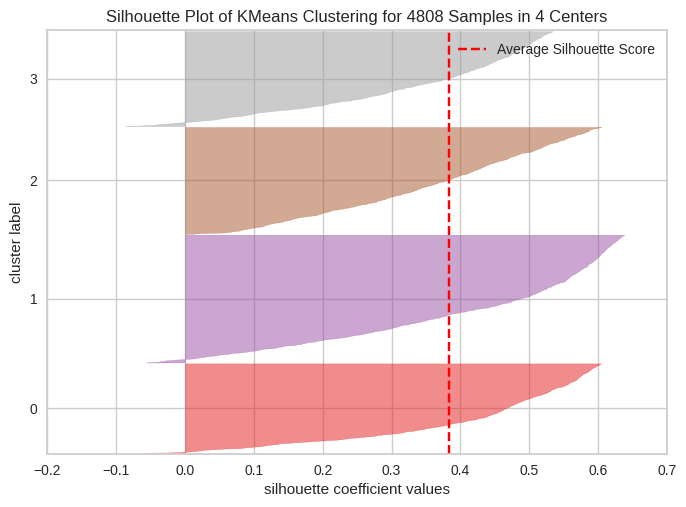

For n_clusters = 5, silhouette score is 0.3830789029598236


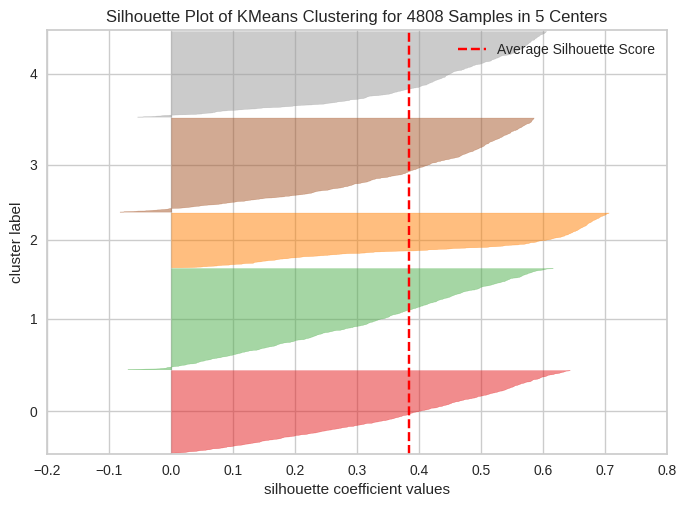

For n_clusters = 6, silhouette score is 0.3935084939002991


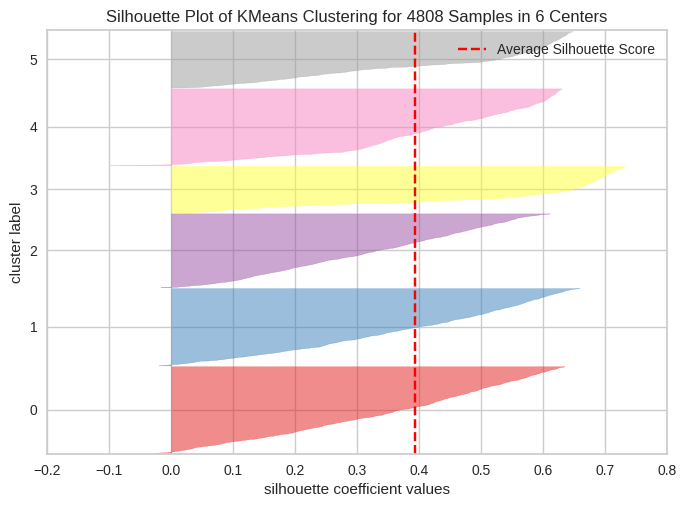

For n_clusters = 7, silhouette score is 0.4032573103904724


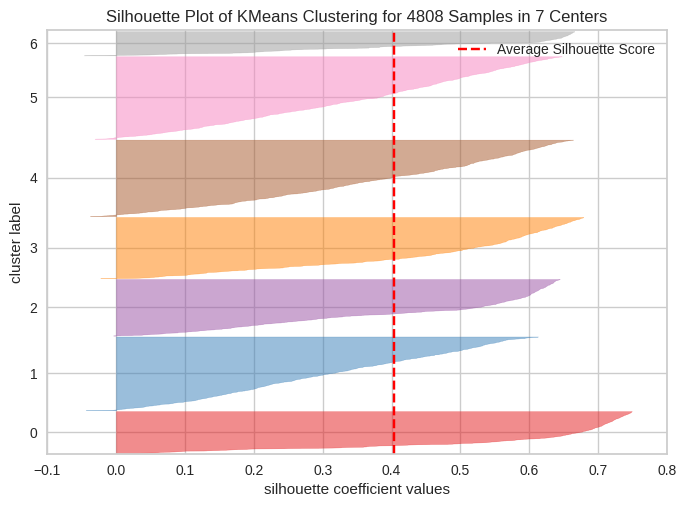

For n_clusters = 8, silhouette score is 0.396904855966568


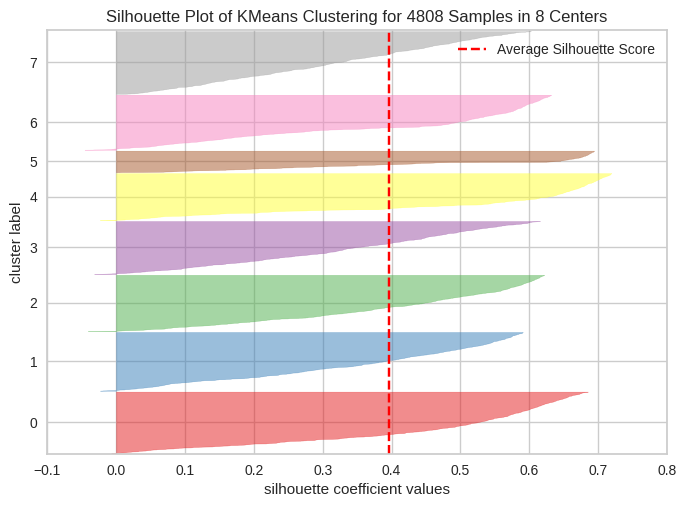

For n_clusters = 9, silhouette score is 0.40564900636672974


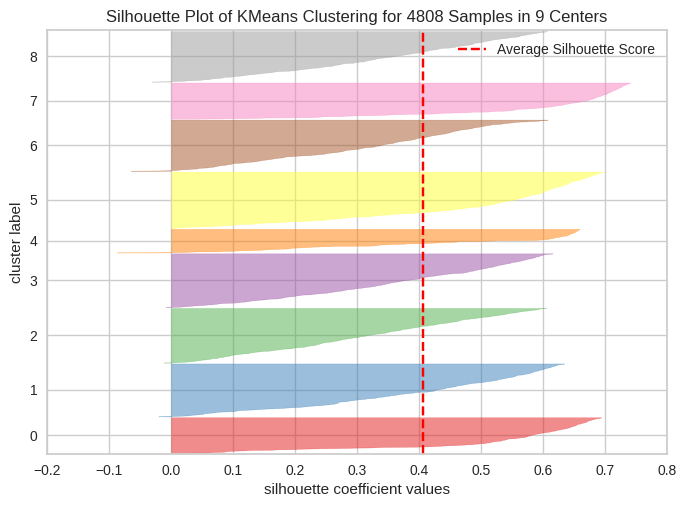

For n_clusters = 10, silhouette score is 0.398882120847702


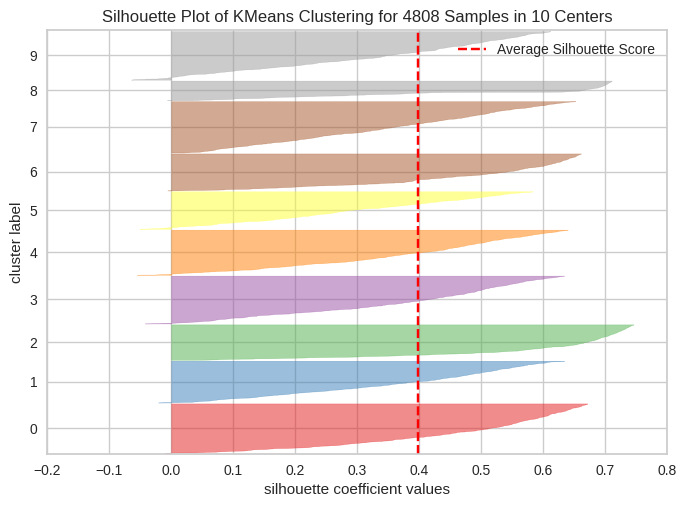

For n_clusters = 11, silhouette score is 0.4100479483604431


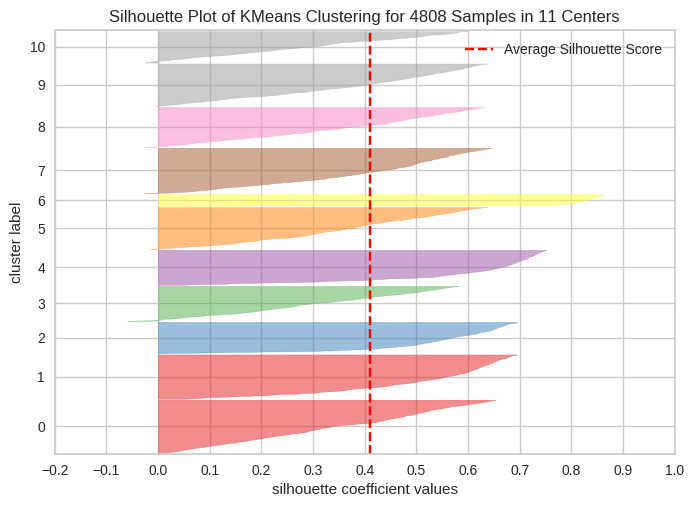

For n_clusters = 12, silhouette score is 0.41151249408721924


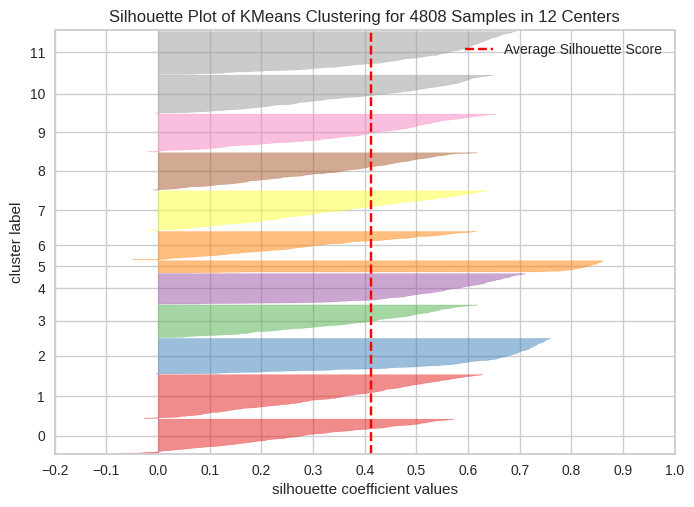

For n_clusters = 13, silhouette score is 0.4087042510509491


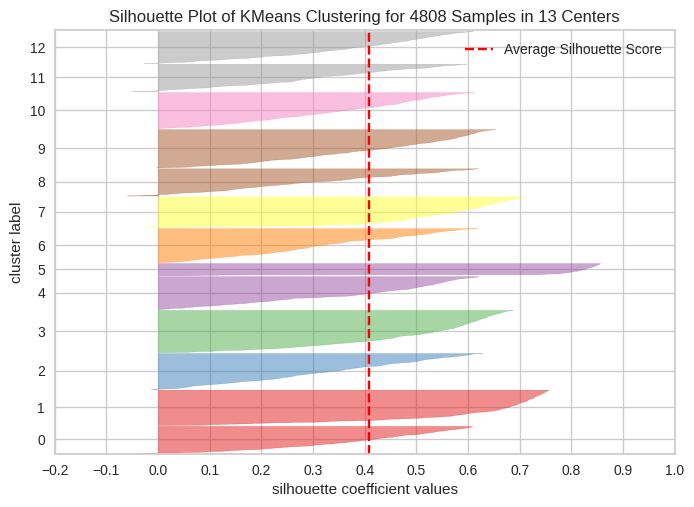

For n_clusters = 14, silhouette score is 0.4029071033000946


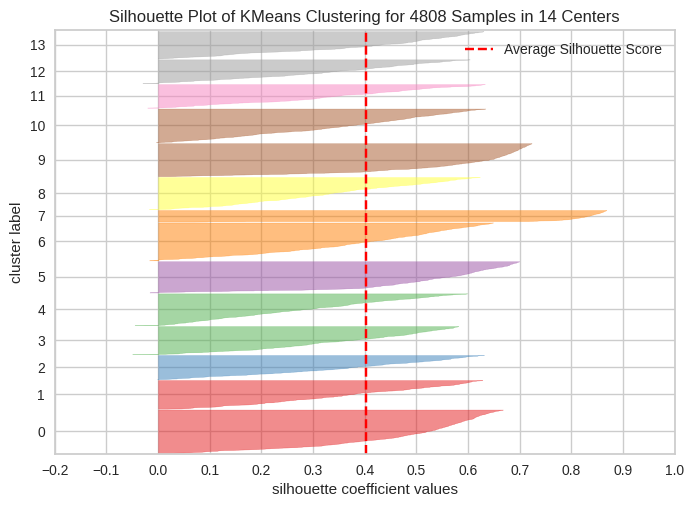

For n_clusters = 15, silhouette score is 0.3990658223628998


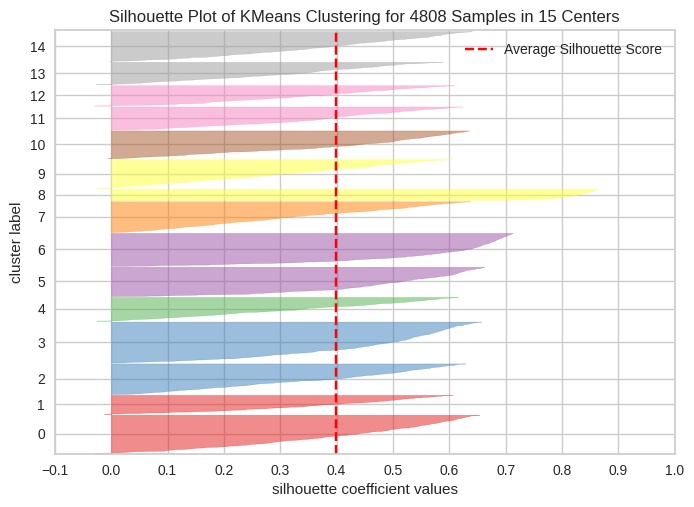

For n_clusters = 16, silhouette score is 0.39240995049476624


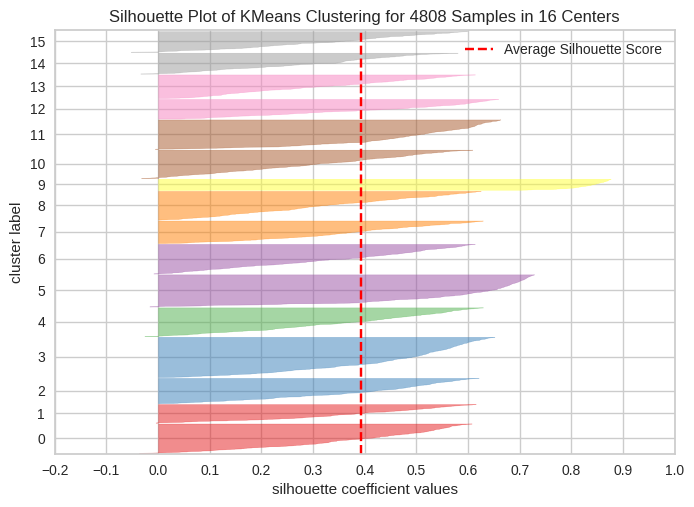

For n_clusters = 17, silhouette score is 0.3957487940788269


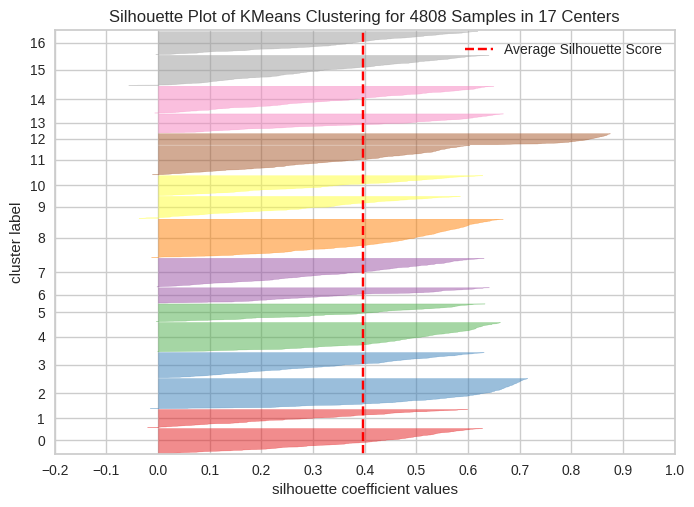

For n_clusters = 18, silhouette score is 0.3913392424583435


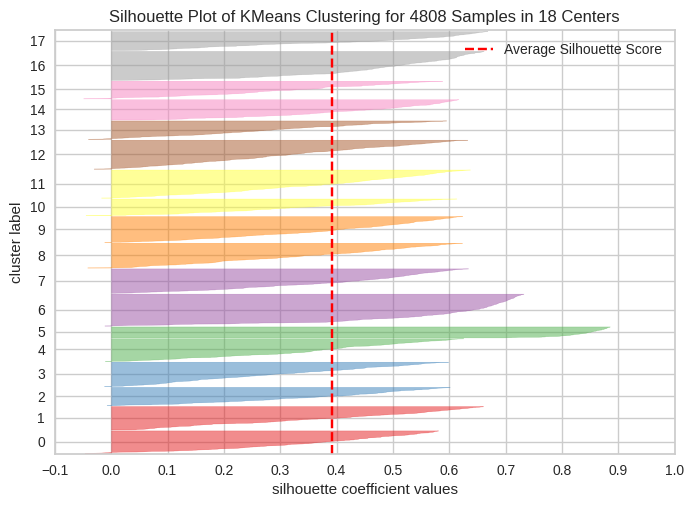

For n_clusters = 19, silhouette score is 0.38812124729156494


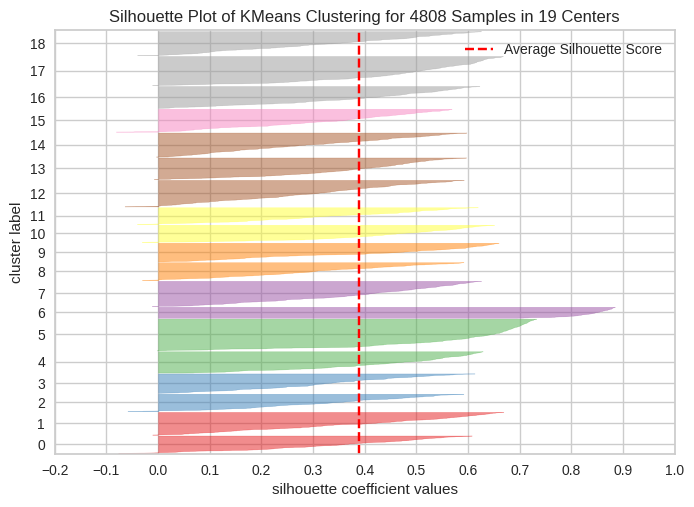

In [ ]:
silhouette_analysis(20)

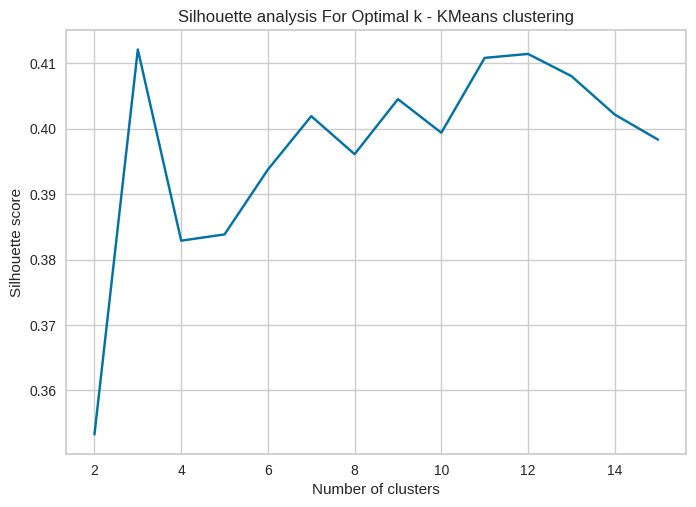

In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(tsne_df)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(tsne_df, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 3 clusters.
* Building 3 clusters using the k-means clustering algorithm.


Elbow Method:

The Elbow Method is a popular technique used to determine the optimal number of clusters in k-means clustering. The method plots a graph that helps you visually identify the best number of clusters for your data. Here's how it works:

Plotting Criteria: In the Elbow Method, you plot the number of clusters on the x-axis and a measure of clustering quality on the y-axis. The most common measure for the y-axis is the Within-Cluster Sum of Squares (WCSS), which is the sum of the squared distances between each data point and the centroid of its assigned cluster. The idea is to measure how compact the clusters are, with lower values of WCSS indicating more tightly grouped data.

Running the Algorithm: You run the k-means clustering algorithm on your dataset for a range of cluster numbers (e.g., 1 to 10). For each number of clusters, you calculate the WCSS.

Creating the Elbow Plot: Plot these WCSS values against the number of clusters on a graph.

Interpreting the Plot: The plot typically shows a rapid decrease in WCSS as the number of clusters increases, but after a certain point, the rate of decrease sharply slows down, creating an "elbow" in the graph. The number of clusters at this "elbow" point is considered to be the optimal number. This is because adding more clusters beyond this point doesn't provide much better modeling of the data.

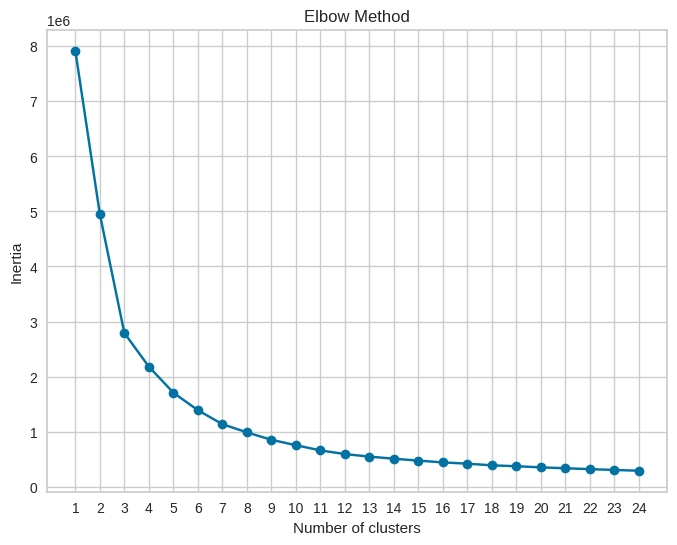

In [ ]:
inertia = []  # List to store the inertia for each k
for k in range(1,25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(tsne_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 25))
plt.show()

the elbow seems to occur around 3 clusters. This suggests that 3 is the optimal number of clusters for this particular dataset. Beyond this point, increasing the number of clusters doesn't provide as significant an improvement in the clustering.

In [ ]:
# Apply k-means with the chosen number of clusters (assuming k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(tsne_df)

# Convert the NumPy array tsne_df into a DataFrame
tsne_df = pd.DataFrame(tsne_df)

# Check if the 'Cluster' column exists in tsne_df and add it if necessary
if 'Cluster' not in tsne_df.columns:
    tsne_df['Cluster'] = cluster_labels
else:
    tsne_df['Cluster'] = cluster_labels

# Analyze the clusters
# This part involves statistical analysis of each cluster, for example:
print(tsne_df.groupby('Cluster').mean())

                 0          1
Cluster                      
0       -29.958349  -1.174298
1        15.665586  34.797672
2        15.016101 -26.348949


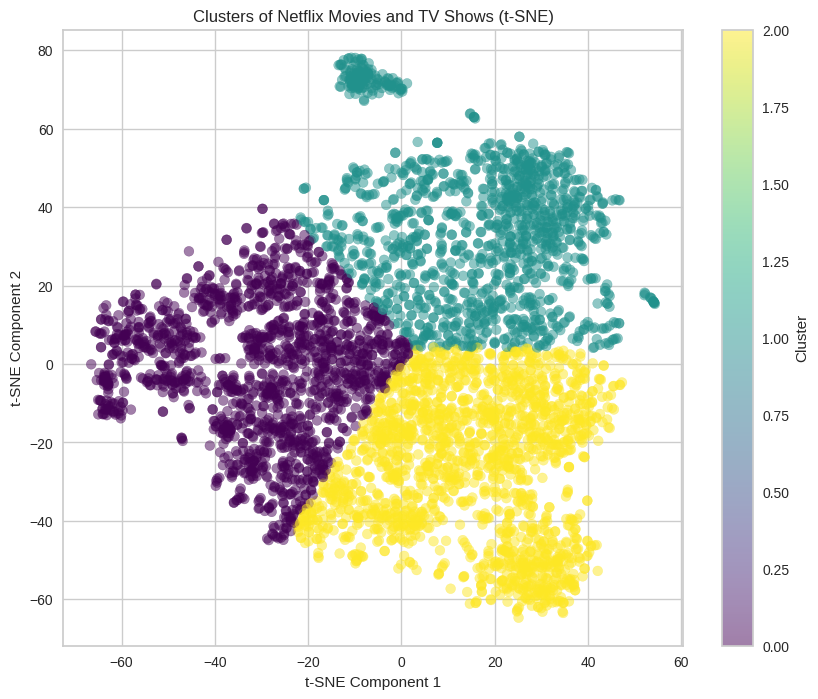

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df.iloc[:, 0], tsne_df.iloc[:, 1], c=tsne_df['Cluster'], cmap='viridis', alpha=0.5, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters of Netflix Movies and TV Shows (t-SNE)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(tsne_df, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(2791725.5, 0.4125220258080951)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

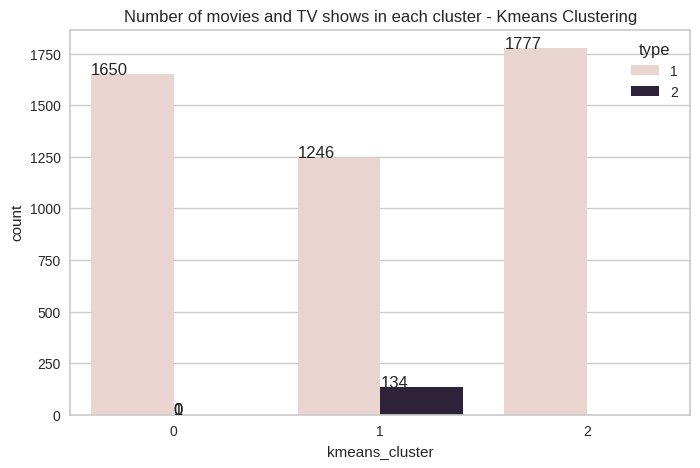

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### **7.2 Hierarchical clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

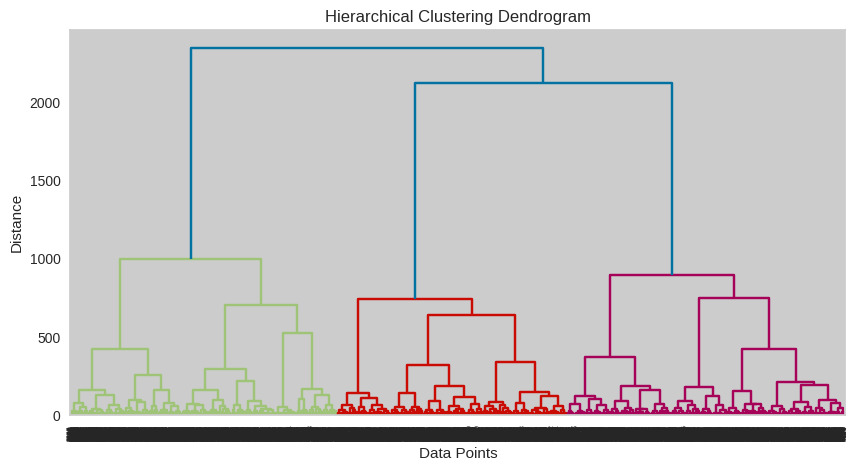

In [ ]:
# Perform hierarchical clustering
Z = linkage(tsne_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
tsne_df.columns = tsne_df.columns.astype(str)
hierarchical.fit_predict(tsne_df)


array([2, 2, 2, ..., 1, 2, 1])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

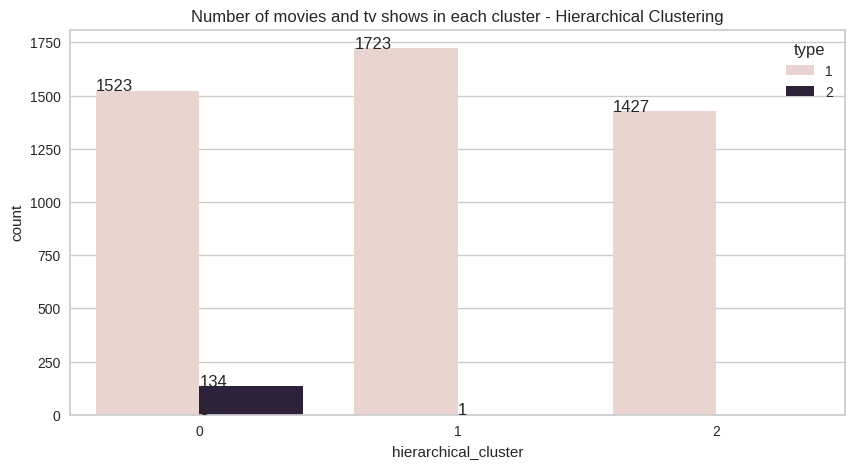

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

## **Project Report: Clustering Analysis of Netflix Movies and TV Shows**

Introduction:
The goal of this project was to perform clustering analysis on a dataset containing information about Netflix movies and TV shows. The dataset included various attributes such as the type (movie or TV show), title, director, cast, country, release year, rating, duration, and description of each title. The objective was to uncover underlying patterns and group similar titles together based on these attributes using unsupervised machine learning techniques.

Data Preprocessing:
The initial step involved data preprocessing to handle missing values and transform textual data into a format suitable for analysis. Missing values were dropped, and textual columns such as director, cast, listed_in, and description were preprocessed by tokenization, lemmatization, and removal of stopwords. Additionally, categorical variables were encoded using ordinal encoding, and text data was vectorized using TF-IDF (Term Frequency-Inverse Document Frequency) to represent each title's description.

Dimensionality Reduction:
To reduce the dimensionality of the dataset and facilitate clustering, Principal Component Analysis (PCA) was applied to the TF-IDF matrix. This process helped capture the most significant information from the textual data while reducing computational complexity. The explained variance ratio was examined to determine the optimal number of principal components to retain.

Clustering Analysis:
K-means clustering was chosen as the primary clustering algorithm to group titles based on their attributes. The optimal number of clusters was determined using the elbow method and silhouette analysis. The K-means algorithm was applied to the dataset, and cluster labels were assigned to each title.

Visualization:
The clusters were visualized using t-SNE (t-distributed Stochastic Neighbor Embedding) to visualize the high-dimensional data in two dimensions. This allowed for a visual representation of the clusters, enabling insights into the relationships between different titles based on their attributes.

Conclusion:
In conclusion, the clustering analysis of Netflix movies and TV shows revealed meaningful insights into the content available on the platform. By grouping similar titles together, the analysis can assist in content recommendation systems, content categorization, and understanding viewers' preferences. The project demonstrated the effectiveness of unsupervised learning techniques in extracting patterns and structures from complex datasets. Further refinement and exploration could lead to more targeted and personalized content recommendations for Netflix users.

Future Directions:
Future work could involve refining the clustering algorithm, incorporating additional features such as user ratings and genre information, and evaluating the performance of the clustering model using metrics such as silhouette score and Davies-Bouldin index. Additionally, deploying the model in a production environment and integrating it into Netflix's recommendation system could provide valuable insights and improve user experience.